In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-category-trainingdata/news_category_trainingdata.json


In [2]:
import os
# try:
#   import ktrain
# except:
#   !pip install ktrain
#   os.kill(os.getpid(), 9)
# import ktrain

from sklearn.model_selection import train_test_split
!pip install tf-keras
print("TF_USE_LEGACY_KERAS:", os.getenv("TF_USE_LEGACY_KERAS"))
os.environ['TF_USE_LEGACY_KERAS'] = '1'
print("TF_USE_LEGACY_KERAS:", os.getenv("TF_USE_LEGACY_KERAS"))

try:
  import ktrain
except:
  !pip install ktrain
  import ktrain
from ktrain import text
from ktrain.text import texts_from_df


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
TF_USE_LEGACY_KERAS: None
TF_USE_LEGACY_KERAS: 1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 66.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 46.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - d

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Jun 21 01:18:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 33.7 gigabytes of available RAM

You are using a high-RAM runtime!


In [5]:
reviews = pd.read_json("/kaggle/input/news-category-trainingdata/news_category_trainingdata.json")

## EDA

In [6]:
reviews.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [7]:
reviews["category"].value_counts()

category
POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: c

In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 10.7+ MB


## Prepare Data

In [9]:
reviews["combined_text"] = reviews["headline"].str.lower() + ' ' + reviews["short_description"].str.lower()

In [10]:
# healthy living and wellness articles
reviews[reviews["category"].str.contains("HEALTHY LIVING")].head()

,category,headline,authors,link,short_description,date,combined_text
7578,HEALTHY LIVING,To The People Who Say ‘I’m Tired’ When Someone...,"The Mighty, ContributorWe face disability, dis...",https://www.huffingtonpost.com/entry/to-the-pe...,"When you feel like this, it’s important to kno...",2018-01-16,to the people who say ‘i’m tired’ when someone...
7693,HEALTHY LIVING,Eating Shake Shack Made Me Feel Healthier Than...,"Colleen Werner, ContributorCampus Editor-at-Large",https://www.huffingtonpost.com/entry/eating-sh...,I can vividly remember the first time I felt f...,2018-01-12,eating shake shack made me feel healthier than...
7747,HEALTHY LIVING,How To Stay Updated On The News Without Losing...,Lindsay Holmes,https://www.huffingtonpost.com/entry/anxiety-f...,Because it's only becoming more of a struggle.,2018-01-12,how to stay updated on the news without losing...
7927,HEALTHY LIVING,27 Perfect Tweets About Whole30 That Will Make...,Lindsay Holmes,https://www.huffingtonpost.com/entry/tweets-ab...,"""The only Whole30 I want to participate in is ...",2018-01-10,27 perfect tweets about whole30 that will make...
7934,HEALTHY LIVING,The Real Reason Your Hands Are Always Cold,"Refinery29, ContributorThe #1 new-media brand ...",https://www.huffingtonpost.com/entry/the-real-...,"Essentially, your hands are kept warm thanks t...",2018-01-10,the real reason your hands are always cold ess...


In [11]:
reviews[reviews["category"].str.contains("HEALTHY LIVING")].shape

(6694, 7)

In [12]:
# healthy living and wellness articles
reviews[reviews["category"].str.contains("WELLNESS")].head()

,category,headline,authors,link,short_description,date,combined_text
124989,WELLNESS,Why Overeating Doesn't Make You Fat,"Mark Hyman, MD, Contributor\nPracticing Physician",https://www.huffingtonpost.com/entry/overeatin...,If you take the right approach to ending your ...,2014-04-17,why overeating doesn't make you fat if you tak...
124990,WELLNESS,14 Habits Of People With A Healthy Relationshi...,Sarah Klein,https://www.huffingtonpost.com/entry/healthy-r...,After a long list of rules and habits like the...,2014-04-17,14 habits of people with a healthy relationshi...
124993,WELLNESS,5 Things That Could Be Stealing Your Joy,"Amanda Gore, Contributor\nInternational keynot...",https://www.huffingtonpost.com/entry/joy_us_5b...,Listen to yourself all day today -- are you an...,2014-04-17,5 things that could be stealing your joy liste...
124994,WELLNESS,Moments Make a Life,"Megan McDonough, Contributor\nCEO, Wholebeing ...",https://www.huffingtonpost.com/entry/moments-m...,Consciously constructing positive habits -- or...,2014-04-17,moments make a life consciously constructing p...
124996,WELLNESS,Fat Facts,"Maria Rodale, Contributor\nCEO and Chairman of...",https://www.huffingtonpost.com/entry/fat-facts...,"Human fat cells, photo by Dr. Peeke Here's how...",2014-04-17,"fat facts human fat cells, photo by dr. peeke ..."


In [13]:
reviews[reviews["category"].str.contains("WELLNESS")].shape

(17827, 7)

In [14]:
reviews["health_wellness"] = np.where((reviews["category"] == "HEALTHY LIVING") | (reviews["category"] == "WELLNESS"), 1, 0)

In [15]:
reviews["health_wellness"].value_counts()

health_wellness
0    176332
1     24521
Name: count, dtype: int64

In [16]:
target_names = ["NOT HEALTH WELLNESS", "HEALTH WELLNESS"]

## Balance the Data

In [17]:
sample_amount = 24000

health_wellness = reviews[reviews["health_wellness"] == 1].sample(n=sample_amount)
not_health_wellness = reviews[reviews["health_wellness"] == 0].sample(n=sample_amount)

In [18]:
review_sample = pd.concat([health_wellness, not_health_wellness])

In [19]:
review_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48000 entries, 196252 to 54690
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   category           48000 non-null  object        
 1   headline           48000 non-null  object        
 2   authors            48000 non-null  object        
 3   link               48000 non-null  object        
 4   short_description  48000 non-null  object        
 5   date               48000 non-null  datetime64[ns]
 6   combined_text      48000 non-null  object        
 7   health_wellness    48000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 3.3+ MB


In [20]:
def ktrain_model(preprocess_mode, text_process):
    train, val, preprocess = ktrain.text.texts_from_df(
    review_sample,
    "combined_text",
    label_columns=["health_wellness"],
    val_df=None,
    max_features=20000,
    maxlen=512,
    val_pct=0.1,
    ngram_range=1,
    preprocess_mode=preprocess_mode,
    verbose=1
    )

    model = ktrain.text.text_classifier(text_process, train, preproc=preprocess)

    learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=8)

    learner.lr_find(max_epochs=6)

    learner.lr_plot()

    history=learner.autofit(
    1e-2,
    checkpoint_folder='checkpoint',
    epochs=10,
    early_stopping=True
    )

    predictor = ktrain.get_predictor(learner.model, preproc=preprocess)

    validation = learner.validate(val_data=val, print_report=True)

['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
142423                  0.0              1.0
82711                   1.0              0.0
147989                  0.0              1.0
32782                   0.0              1.0
189522                  0.0              1.0
['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
45411                   1.0              0.0
180832                  1.0              0.0
75735                   0.0              1.0
92041                   1.0              0.0
26772                   1.0              0.0
language: en
Word Counts: 52452
Nrows: 43200
43200 train sequences
train sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 67
x_train shape: (43200,512)
y_train shape: (43200, 2)
Is Multi-Label? False
4800 test sequences
test sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 66
x_test shape: (4800,512)
y_test shape: (4800, 2)
Is Multi-Label? Fa

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/6
5400/5400 [==============================] - 48s 4ms/step - loss: 1.0503 - accuracy: 0.4915
Epoch 2/6
5400/5400 [==============================] - 21s 4ms/step - loss: 0.9600 - accuracy: 0.5050
Epoch 3/6
5400/5400 [==============================] - 21s 4ms/step - loss: 0.6612 - accuracy: 0.6422
Epoch 4/6
5400/5400 [==============================] - 21s 4ms/step - loss: 0.4832 - accuracy: 0.7754
Epoch 5/6
5400/5400 [==============================] - 21s 4ms/step - loss: 0.6948 - accuracy: 0.5290
Epoch 6/6
5400/5400 [==============================] - 21s 4ms/step - loss: 0.9198 - accuracy: 0.5011


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


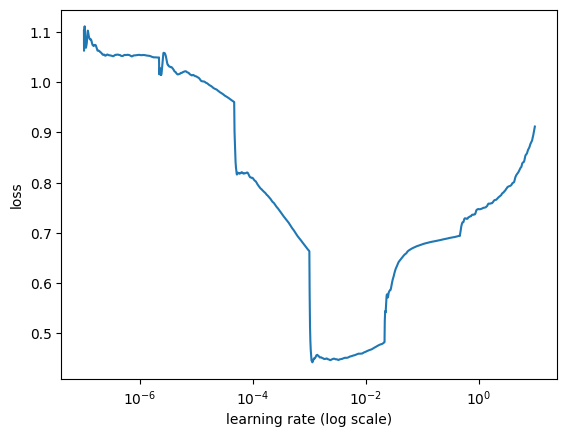



begin training using triangular learning rate policy with max lr of 0.01...
Epoch 1/10
5400/5400 [==============================] - 28s 5ms/step - loss: 0.5419 - accuracy: 0.7379 - val_loss: 0.3448 - val_accuracy: 0.8610
Epoch 2/10
5400/5400 [==============================] - 25s 5ms/step - loss: 0.4291 - accuracy: 0.8157 - val_loss: 0.3128 - val_accuracy: 0.8742
Epoch 3/10
5400/5400 [==============================] - 26s 5ms/step - loss: 0.3924 - accuracy: 0.8343 - val_loss: 0.2978 - val_accuracy: 0.8817
Epoch 4/10
5400/5400 [==============================] - 26s 5ms/step - loss: 0.3681 - accuracy: 0.8479 - val_loss: 0.2928 - val_accuracy: 0.8856
Epoch 5/10
5400/5400 [==============================] - 26s 5ms/step - loss: 0.3527 - accuracy: 0.8582 - val_loss: 0.2865 - val_accuracy: 0.8829
Epoch 6/10
5400/5400 [==============================] - 26s 5ms/step - loss: 0.3348 - accuracy: 0.8661 - val_loss: 0.2835 - val_accuracy: 0.8904
Epoch 7/10
5400/5400 [==============================

In [21]:
ktrain_model("standard", "fasttext")

['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
187629                  0.0              1.0
139508                  1.0              0.0
47839                   1.0              0.0
109931                  0.0              1.0
160166                  0.0              1.0
['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
197392                  0.0              1.0
141017                  0.0              1.0
160105                  0.0              1.0
186679                  0.0              1.0
141347                  1.0              0.0
language: en
Word Counts: 52385
Nrows: 43200
43200 train sequences
train sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 67
x_train shape: (43200,512)
y_train shape: (43200, 2)
Is Multi-Label? False
4800 test sequences
test sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 66
x_test shape: (4800,512)
y_test shape: (4800, 2)
Is Multi-Label? Fa

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/6
5400/5400 [==============================] - 19s 3ms/step - loss: 0.6862 - accuracy: 0.5457
Epoch 2/6
5400/5400 [==============================] - 17s 3ms/step - loss: 0.6526 - accuracy: 0.6410
Epoch 3/6
5400/5400 [==============================] - 17s 3ms/step - loss: 0.4458 - accuracy: 0.8425
Epoch 4/6
5400/5400 [==============================] - 18s 3ms/step - loss: 0.2823 - accuracy: 0.8983
Epoch 5/6
5400/5400 [==============================] - 12s 2ms/step - loss: 1.0666 - accuracy: 0.8668


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


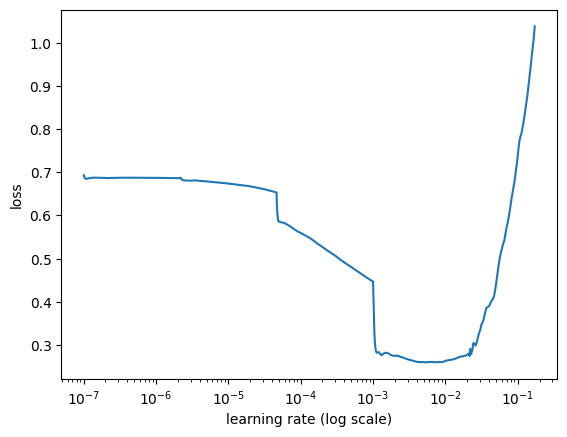



begin training using triangular learning rate policy with max lr of 0.01...
Epoch 1/10
5400/5400 [==============================] - 23s 4ms/step - loss: 0.3091 - accuracy: 0.8825 - val_loss: 0.3324 - val_accuracy: 0.8792
Epoch 2/10
5400/5400 [==============================] - 22s 4ms/step - loss: 0.2192 - accuracy: 0.9226 - val_loss: 0.3887 - val_accuracy: 0.8760
Epoch 2: early stopping
Weights from best epoch have been loaded into model.
150/150 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2399
           1       0.88      0.88      0.88      2401

    accuracy                           0.88      4800
   macro avg       0.88      0.88      0.88      4800
weighted avg       0.88      0.88      0.88      4800



In [22]:
ktrain_model("standard", "nbsvm")

['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
132708                  0.0              1.0
183151                  1.0              0.0
7319                    1.0              0.0
18765                   0.0              1.0
86471                   1.0              0.0
['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
86796                   1.0              0.0
139753                  0.0              1.0
49847                   1.0              0.0
11244                   1.0              0.0
150766                  0.0              1.0
language: en
Word Counts: 52309
Nrows: 43200
43200 train sequences
train sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 67
x_train shape: (43200,512)
y_train shape: (43200, 2)
Is Multi-Label? False
4800 test sequences
test sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 68
x_test shape: (4800,512)
y_test shape: (4800, 2)
Is Multi-Label? Fa

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/6
5400/5400 [==============================] - 19s 3ms/step - loss: 0.6920 - accuracy: 0.5221
Epoch 2/6
5400/5400 [==============================] - 17s 3ms/step - loss: 0.6667 - accuracy: 0.6175
Epoch 3/6
5400/5400 [==============================] - 17s 3ms/step - loss: 0.5000 - accuracy: 0.8170
Epoch 4/6
5400/5400 [==============================] - 17s 3ms/step - loss: 0.3347 - accuracy: 0.8794
Epoch 5/6
5400/5400 [==============================] - 10s 2ms/step - loss: 1.2385 - accuracy: 0.8455


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


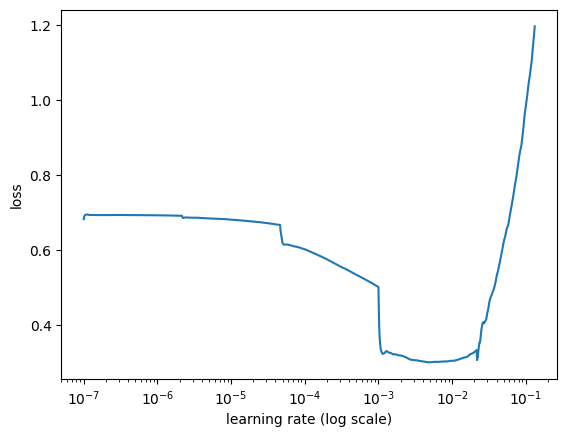



begin training using triangular learning rate policy with max lr of 0.01...
Epoch 1/10
5400/5400 [==============================] - 23s 4ms/step - loss: 0.3634 - accuracy: 0.8589 - val_loss: 0.3467 - val_accuracy: 0.8737
Epoch 2/10
5400/5400 [==============================] - 22s 4ms/step - loss: 0.2516 - accuracy: 0.9092 - val_loss: 0.3957 - val_accuracy: 0.8731
Epoch 2: early stopping
Weights from best epoch have been loaded into model.
150/150 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2375
           1       0.86      0.89      0.88      2425

    accuracy                           0.87      4800
   macro avg       0.87      0.87      0.87      4800
weighted avg       0.87      0.87      0.87      4800



In [23]:
ktrain_model("standard", "logreg")

['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
44059                   1.0              0.0
136479                  1.0              0.0
92452                   1.0              0.0
18053                   1.0              0.0
101910                  0.0              1.0
['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
81307                   1.0              0.0
50377                   1.0              0.0
97597                   1.0              0.0
145533                  1.0              0.0
35819                   1.0              0.0
language: en
Word Counts: 52337
Nrows: 43200
43200 train sequences
train sequence lengths:
	mean : 32
	95percentile : 57
	99percentile : 67
x_train shape: (43200,512)
y_train shape: (43200, 2)
Is Multi-Label? False
4800 test sequences
test sequence lengths:
	mean : 31
	95percentile : 56
	99percentile : 68
x_test shape: (4800,512)
y_test shape: (4800, 2)
Is Multi-Label? Fa

done.
simulating training for different learning rates... this may take a few moments...


/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/6
5400/5400 [==============================] - 160s 28ms/step - loss: 0.6917 - accuracy: 0.5156
Epoch 2/6
5400/5400 [==============================] - 149s 28ms/step - loss: 0.6375 - accuracy: 0.6589
Epoch 3/6
5400/5400 [==============================] - 151s 28ms/step - loss: 0.3040 - accuracy: 0.8737
Epoch 4/6
5400/5400 [==============================] - 151s 28ms/step - loss: 0.4138 - accuracy: 0.8547
Epoch 5/6
5400/5400 [==============================] - 2s 310us/step - loss: 1.0709 - accuracy: 0.6610


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


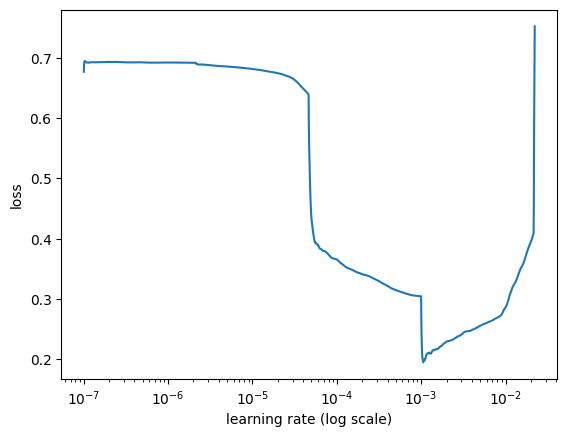



begin training using triangular learning rate policy with max lr of 0.01...
Epoch 1/10
5400/5400 [==============================] - 165s 30ms/step - loss: nan - accuracy: 0.6439 - val_loss: nan - val_accuracy: 0.5085
Epoch 2/10
5400/5400 [==============================] - 162s 30ms/step - loss: nan - accuracy: 0.4991 - val_loss: nan - val_accuracy: 0.5085
Epoch 2: early stopping
Weights from best epoch have been loaded into model.
150/150 [==============================] - 4s 20ms/step
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      2441
           1       0.00      0.00      0.00      2359

    accuracy                           0.51      4800
   macro avg       0.25      0.50      0.34      4800
weighted avg       0.26      0.51      0.34      4800



In [24]:
ktrain_model("standard", "bigru")

['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
133035                  0.0              1.0
128079                  0.0              1.0
136246                  0.0              1.0
157965                  0.0              1.0
31436                   1.0              0.0
['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
176086                  0.0              1.0
4589                    1.0              0.0
191885                  0.0              1.0
65991                   0.0              1.0
26217                   1.0              0.0
language: en
Word Counts: 52346
Nrows: 43200
43200 train sequences
train sequence lengths:
	mean : 32
	95percentile : 57
	99percentile : 67
x_train shape: (43200,512)
y_train shape: (43200, 2)
Is Multi-Label? False
4800 test sequences
test sequence lengths:
	mean : 31
	95percentile : 56
	99percentile : 67
x_test shape: (4800,512)
y_test shape: (4800, 2)
Is Multi-Label? Fa

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/6
5400/5400 [==============================] - 225s 41ms/step - loss: 0.6949 - accuracy: 0.4985
Epoch 2/6
5400/5400 [==============================] - 221s 41ms/step - loss: 0.6941 - accuracy: 0.5038
Epoch 3/6
5400/5400 [==============================] - 221s 41ms/step - loss: 0.4933 - accuracy: 0.7548
Epoch 4/6
5400/5400 [==============================] - 220s 41ms/step - loss: nan - accuracy: 0.6620
Epoch 5/6
5400/5400 [==============================] - 219s 41ms/step - loss: nan - accuracy: 0.4989
Epoch 6/6
5400/5400 [==============================] - 219s 41ms/step - loss: nan - accuracy: 0.4989


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


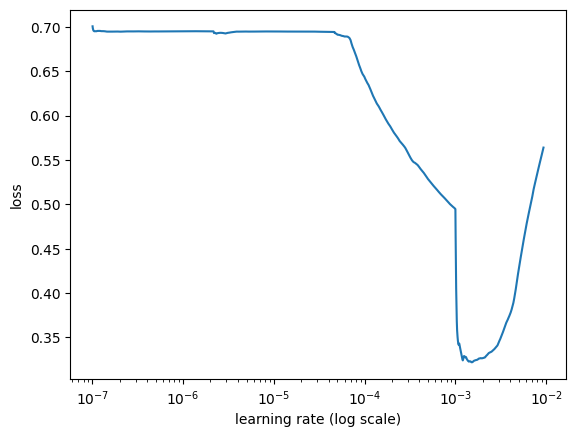



begin training using triangular learning rate policy with max lr of 0.01...
Epoch 1/10
5400/5400 [==============================] - 236s 43ms/step - loss: nan - accuracy: 0.5145 - val_loss: nan - val_accuracy: 0.5100
Epoch 2/10
5400/5400 [==============================] - 232s 43ms/step - loss: nan - accuracy: 0.4989 - val_loss: nan - val_accuracy: 0.5100
Epoch 2: early stopping
Weights from best epoch have been loaded into model.
150/150 [==============================] - 5s 24ms/step
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      2448
           1       0.00      0.00      0.00      2352

    accuracy                           0.51      4800
   macro avg       0.26      0.50      0.34      4800
weighted avg       0.26      0.51      0.34      4800



In [25]:
ktrain_model("standard", "standard_gru")